In [28]:
import numpy as np
from sklearn.model_selection import train_test_split

In [29]:
train_images = np.load('./Task1/train/imgs-001.npy')
test_images = np.load('./Task1/test/imgs.npy')

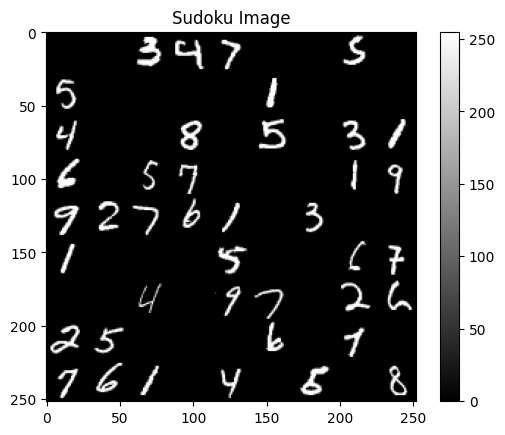

In [30]:
import matplotlib.pyplot as plt

image = train_images[0, :, :]

plt.imshow(image, cmap='gray')  # 'gray' colormap for grayscale images
plt.title('Sudoku Image')
plt.colorbar()  # Add a colorbar to show pixel values
plt.show()


In [31]:
import torch
from torchvision import transforms

new_size = (128, 128)

# Define the transformations
transform = transforms.Compose([
    transforms.ToPILImage(),  # Convert NumPy array to PIL Image
    transforms.Resize(new_size),
    transforms.ToTensor(),  # Convert PIL Image to PyTorch tensor
])

# Apply the transformations to each image
resized_train_images = torch.stack([transform(image) for image in train_images])

# Apply the transformations to each image
resized_test_images = torch.stack([transform(image) for image in test_images])

# Normalize the resized images
normalized_resized_train_images = resized_train_images / 255.0
normalized_resized_test_images = resized_test_images / 255.0

print(normalized_resized_train_images.shape)
print(normalized_resized_test_images.shape)

torch.Size([50000, 1, 128, 128])
torch.Size([10000, 1, 128, 128])


In [32]:
normalized_resized_train_images = resized_train_images.squeeze(dim=1)

print(normalized_resized_train_images.shape)

normalized_resized_test_images = resized_test_images.squeeze(dim=1)

print(normalized_resized_test_images.shape)

torch.Size([50000, 128, 128])
torch.Size([10000, 128, 128])


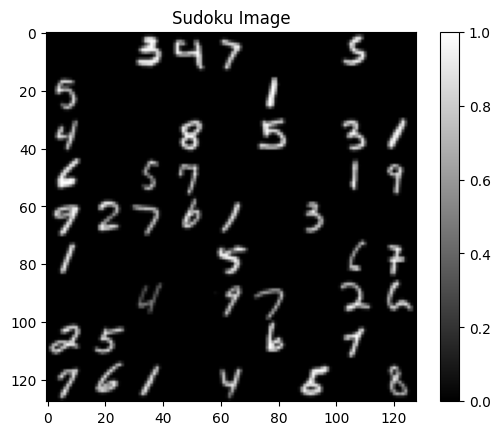

In [33]:
import matplotlib.pyplot as plt

image = normalized_resized_train_images[0, :, :]

plt.imshow(image, cmap='gray')  # 'gray' colormap for grayscale images
plt.title('Sudoku Image')
plt.colorbar()  # Add a colorbar to show pixel values
plt.show()


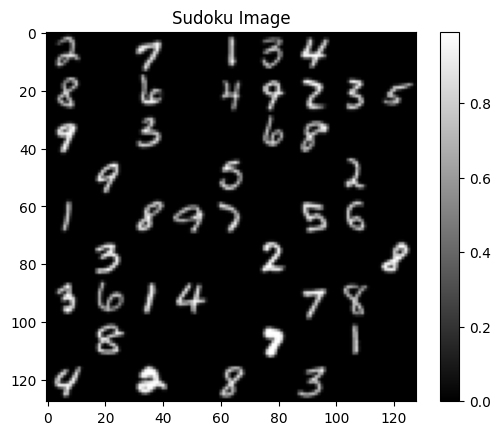

In [34]:
import matplotlib.pyplot as plt

image = normalized_resized_test_images[0, :, :]

plt.imshow(image, cmap='gray')  # 'gray' colormap for grayscale images
plt.title('Sudoku Image')
plt.colorbar()  # Add a colorbar to show pixel values
plt.show()

In [35]:
def preprocess_images_simple(images, new_size=(14, 14)):
    num_images = images.shape[0]
    rows=9
    columns=9
    processed_images = np.zeros((num_images * 81, new_size[0], new_size[1]))

    for idx in range(num_images):
        for row in range(9):
            for col in range(9):
                # Extract each cell
                cell = images[idx, row*new_size[0]:(row+1)*new_size[0], col*new_size[1]:(col+1)*new_size[1]]
                # Store in processed_images
                processed_images[idx * 81 + row * 9 + col]  = cell

    return processed_images

# Convert PyTorch tensor to NumPy array
normalized_resized_train_images_np = normalized_resized_train_images.cpu().numpy()

# Process the entire datasets with reduced resolution
train_images_processed = preprocess_images_simple(normalized_resized_train_images_np)
train_images_processed.shape

(4050000, 14, 14)

In [89]:
test_images_processed = preprocess_images_simple(normalized_resized_test_images.cpu().numpy())
test_images_processed.shape

(810000, 14, 14)

In [37]:
train_labels = np.load('./Task1/train/known_values_labels.npy')

train_labels #x, y, value

array([[[0., 2., 3.],
        [0., 3., 4.],
        [0., 4., 7.],
        ...,
        [8., 4., 4.],
        [8., 6., 5.],
        [8., 8., 8.]],

       [[0., 0., 7.],
        [0., 1., 2.],
        [0., 5., 6.],
        ...,
        [8., 3., 2.],
        [8., 4., 3.],
        [8., 5., 4.]],

       [[0., 0., 7.],
        [0., 5., 8.],
        [0., 7., 6.],
        ...,
        [8., 0., 5.],
        [8., 3., 3.],
        [8., 8., 8.]],

       ...,

       [[0., 1., 2.],
        [0., 4., 1.],
        [0., 6., 8.],
        ...,
        [8., 2., 9.],
        [8., 3., 5.],
        [8., 6., 7.]],

       [[0., 0., 5.],
        [0., 2., 2.],
        [0., 3., 8.],
        ...,
        [8., 5., 3.],
        [8., 6., 5.],
        [8., 8., 7.]],

       [[0., 2., 4.],
        [0., 8., 5.],
        [1., 0., 2.],
        ...,
        [8., 4., 6.],
        [8., 5., 3.],
        [8., 6., 5.]]])

In [38]:
train_labels.shape

(50000, 41, 3)

In [39]:
# train_labels[0, :, :]


In [40]:
import numpy as np

empty_train_labels = np.zeros((1, 81, 3))

x_values, y_values = np.indices((9, 9))
empty_train_labels[:, :, 0] = x_values.flatten()
empty_train_labels[:, :, 1] = y_values.flatten()

print(empty_train_labels)


[[[0. 0. 0.]
  [0. 1. 0.]
  [0. 2. 0.]
  [0. 3. 0.]
  [0. 4. 0.]
  [0. 5. 0.]
  [0. 6. 0.]
  [0. 7. 0.]
  [0. 8. 0.]
  [1. 0. 0.]
  [1. 1. 0.]
  [1. 2. 0.]
  [1. 3. 0.]
  [1. 4. 0.]
  [1. 5. 0.]
  [1. 6. 0.]
  [1. 7. 0.]
  [1. 8. 0.]
  [2. 0. 0.]
  [2. 1. 0.]
  [2. 2. 0.]
  [2. 3. 0.]
  [2. 4. 0.]
  [2. 5. 0.]
  [2. 6. 0.]
  [2. 7. 0.]
  [2. 8. 0.]
  [3. 0. 0.]
  [3. 1. 0.]
  [3. 2. 0.]
  [3. 3. 0.]
  [3. 4. 0.]
  [3. 5. 0.]
  [3. 6. 0.]
  [3. 7. 0.]
  [3. 8. 0.]
  [4. 0. 0.]
  [4. 1. 0.]
  [4. 2. 0.]
  [4. 3. 0.]
  [4. 4. 0.]
  [4. 5. 0.]
  [4. 6. 0.]
  [4. 7. 0.]
  [4. 8. 0.]
  [5. 0. 0.]
  [5. 1. 0.]
  [5. 2. 0.]
  [5. 3. 0.]
  [5. 4. 0.]
  [5. 5. 0.]
  [5. 6. 0.]
  [5. 7. 0.]
  [5. 8. 0.]
  [6. 0. 0.]
  [6. 1. 0.]
  [6. 2. 0.]
  [6. 3. 0.]
  [6. 4. 0.]
  [6. 5. 0.]
  [6. 6. 0.]
  [6. 7. 0.]
  [6. 8. 0.]
  [7. 0. 0.]
  [7. 1. 0.]
  [7. 2. 0.]
  [7. 3. 0.]
  [7. 4. 0.]
  [7. 5. 0.]
  [7. 6. 0.]
  [7. 7. 0.]
  [7. 8. 0.]
  [8. 0. 0.]
  [8. 1. 0.]
  [8. 2. 0.]
  [8. 3. 0.]
  [8. 4. 0.]

In [41]:
appended_labels = np.zeros((train_labels.shape[0], 81, 3))

# Iterate over each puzzle in train_labels and find missing combinations
for i in range(train_labels.shape[0]):
    puzzle_labels = train_labels[i]

    # Find the missing combinations from empty_train_labels
    puzzle_indices = puzzle_labels[:, :2].astype(int)
    all_indices = np.arange(81)
    missing_indices = np.setdiff1d(all_indices, np.ravel_multi_index(puzzle_indices.T, (9, 9)), assume_unique=True)

    # Make sure missing indices are within the bounds of the puzzle size
    missing_indices = missing_indices[missing_indices < 81]

    # Copy existing labels to the appended array
    appended_labels[i, :puzzle_labels.shape[0], :] = puzzle_labels

    # Append the missing combinations to the appended array
    appended_labels[i, puzzle_labels.shape[0]:puzzle_labels.shape[0]+len(missing_indices), :] = empty_train_labels[0, missing_indices, :]

    # Sort the appended array based on the first two columns (x, y combinations)
    sorted_indices = np.lexsort((appended_labels[i, :, 1], appended_labels[i, :, 0]))
    appended_labels[i] = appended_labels[i, sorted_indices]

# Display the sorted array
print(appended_labels[0])

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 2. 3.]
 [0. 3. 4.]
 [0. 4. 7.]
 [0. 5. 0.]
 [0. 6. 0.]
 [0. 7. 5.]
 [0. 8. 0.]
 [1. 0. 5.]
 [1. 1. 0.]
 [1. 2. 0.]
 [1. 3. 0.]
 [1. 4. 0.]
 [1. 5. 1.]
 [1. 6. 0.]
 [1. 7. 0.]
 [1. 8. 0.]
 [2. 0. 4.]
 [2. 1. 0.]
 [2. 2. 0.]
 [2. 3. 8.]
 [2. 4. 0.]
 [2. 5. 5.]
 [2. 6. 0.]
 [2. 7. 3.]
 [2. 8. 1.]
 [3. 0. 6.]
 [3. 1. 0.]
 [3. 2. 5.]
 [3. 3. 7.]
 [3. 4. 0.]
 [3. 5. 0.]
 [3. 6. 0.]
 [3. 7. 1.]
 [3. 8. 9.]
 [4. 0. 9.]
 [4. 1. 2.]
 [4. 2. 7.]
 [4. 3. 6.]
 [4. 4. 1.]
 [4. 5. 0.]
 [4. 6. 3.]
 [4. 7. 0.]
 [4. 8. 0.]
 [5. 0. 1.]
 [5. 1. 0.]
 [5. 2. 0.]
 [5. 3. 0.]
 [5. 4. 5.]
 [5. 5. 0.]
 [5. 6. 0.]
 [5. 7. 6.]
 [5. 8. 7.]
 [6. 0. 0.]
 [6. 1. 0.]
 [6. 2. 4.]
 [6. 3. 0.]
 [6. 4. 9.]
 [6. 5. 7.]
 [6. 6. 0.]
 [6. 7. 2.]
 [6. 8. 6.]
 [7. 0. 2.]
 [7. 1. 5.]
 [7. 2. 0.]
 [7. 3. 0.]
 [7. 4. 0.]
 [7. 5. 6.]
 [7. 6. 0.]
 [7. 7. 7.]
 [7. 8. 0.]
 [8. 0. 7.]
 [8. 1. 6.]
 [8. 2. 1.]
 [8. 3. 0.]
 [8. 4. 4.]
 [8. 5. 0.]
 [8. 6. 5.]
 [8. 7. 0.]
 [8. 8. 8.]]


In [42]:
modified_labels = np.array(appended_labels)
modified_labels

array([[[0., 0., 0.],
        [0., 1., 0.],
        [0., 2., 3.],
        ...,
        [8., 6., 5.],
        [8., 7., 0.],
        [8., 8., 8.]],

       [[0., 0., 7.],
        [0., 1., 2.],
        [0., 2., 0.],
        ...,
        [8., 6., 0.],
        [8., 7., 0.],
        [8., 8., 0.]],

       [[0., 0., 7.],
        [0., 1., 0.],
        [0., 2., 0.],
        ...,
        [8., 6., 0.],
        [8., 7., 0.],
        [8., 8., 8.]],

       ...,

       [[0., 0., 0.],
        [0., 1., 2.],
        [0., 2., 0.],
        ...,
        [8., 6., 7.],
        [8., 7., 0.],
        [8., 8., 0.]],

       [[0., 0., 5.],
        [0., 1., 0.],
        [0., 2., 2.],
        ...,
        [8., 6., 5.],
        [8., 7., 0.],
        [8., 8., 7.]],

       [[0., 0., 0.],
        [0., 1., 0.],
        [0., 2., 4.],
        ...,
        [8., 6., 5.],
        [8., 7., 0.],
        [8., 8., 0.]]])

In [43]:
#train_labels_tensor = torch.tensor(train_labels)
train_labels_tensor = torch.tensor(modified_labels)
# Print the shape of the resulting PyTorch tensor
print(train_labels_tensor.shape)

torch.Size([50000, 81, 3])


In [44]:
# We need to convert train_labels to a format suitable for training
def prepare_labels(labels):
    # Flatten the labels into a 1D array
    # Each image contributes 81 (9x9) cells
    num_images = len(labels)
    new_labels = np.zeros((num_images * 81), dtype=int)

    for i, label in enumerate(labels):
        for cell in label:
            x, y, value = cell
            x, y, value = int(x), int(y), int(value)  # Ensure integers
            if 0 <= x < 9 and 0 <= y < 9:  # Check for bounds
                # Convert 2D coordinates to 1D index and set the value
                new_labels[i * 81 + x * 9 + y] = value

    return new_labels

train_labels_processed = prepare_labels(train_labels)

In [45]:
# def prepare_labels(labels):
#     # Flatten the labels into a 1D array
#     # Each image contributes 81 (9x9) cells
#     num_images = len(labels)
#     labels_array = np.zeros((num_images, 9, 9), dtype=int)

#     for i, label in enumerate(labels):
#         for cell in label:
#             x, y, value = cell
#             x, y, value = int(x), int(y), int(value)  # Ensure integers
            
#             if 0 <= x < 9 and 0 <= y < 9:  # Check for bounds
#                 # Convert 2D coordinates to 1D index and set the value
#                 labels_array[i, x, y] = value

#     return labels_array

# train_labels_processed = prepare_labels(train_labels_tensor)

In [46]:
train_labels_processed.shape

(4050000,)

In [47]:
train_images_processed.shape

(4050000, 14, 14)

In [48]:
print(type(train_labels_processed))
print(train_labels_processed)

<class 'numpy.ndarray'>
[0 0 3 ... 5 0 0]


In [90]:
from torch.utils.data import DataLoader, TensorDataset

train_labels_processed = torch.tensor(train_labels_processed, dtype=torch.long)

# Assuming train_images_processed is a PyTorch tensor
train_images_processed = torch.tensor(train_images_processed, dtype=torch.float32)

test_images_processed = torch.tensor(test_images_processed, dtype=torch.float32)

# Create DataLoader for training data
# train_dataset = TensorDataset(train_images_processed, train_labels_processed)
# batch_size = 64
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

/tmp/ipykernel_3436554/3703828578.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_processed = torch.tensor(train_labels_processed, dtype=torch.long)
/tmp/ipykernel_3436554/3703828578.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_images_processed = torch.tensor(train_images_processed, dtype=torch.float32)


In [91]:
train_images_processed=train_images_processed.unsqueeze(1)
test_images_processed=test_images_processed.unsqueeze(1)

In [92]:
print(train_labels_processed.shape)
print(train_images_processed.shape)
print(test_images_processed.shape)

torch.Size([4050000])
torch.Size([4050000, 1, 1, 1, 14, 14])
torch.Size([810000, 1, 14, 14])


In [93]:
from torch.utils.data import TensorDataset, DataLoader
test_dataset = TensorDataset(test_images_processed)

# Create a DataLoader for batching and shuffling
batch_size = 64  # Adjust the batch size as needed
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Assuming you have images and labels as torch tensors
images = train_images_processed
labels = train_labels_processed

# Create a TensorDataset
dataset = TensorDataset(images, labels)

# Create a DataLoader for batching and shuffling
batch_size = 64  # Adjust the batch size as needed
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# MLP model
class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(14 * 14, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)  # Assuming 10 classes, adjust as needed

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Instantiate the model, loss function, and optimizer
model = MLPModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10  # Adjust as needed
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for batch_images, batch_labels in data_loader:
        batch_images, batch_labels = batch_images.to(device), batch_labels.to(device)

        optimizer.zero_grad()
        outputs = model(batch_images)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(data_loader)}")

# Now, your model is trained and ready to make predictions.


Epoch 1/10, Loss: 0.05712399110755861
Epoch 2/10, Loss: 0.024712603704355754
Epoch 3/10, Loss: 0.020111796752121238
Epoch 4/10, Loss: 0.017554634953593478
Epoch 5/10, Loss: 0.01589994025565134
Epoch 6/10, Loss: 0.014855967837346596
Epoch 7/10, Loss: 0.013940221802408625
Epoch 8/10, Loss: 0.013408341770948962
Epoch 9/10, Loss: 0.01286444905723843
Epoch 10/10, Loss: 0.012356148460778154


In [94]:
all_predictions = []

model.eval()

for batch in test_data_loader:
    images = batch[0] 
    images = images.to(device)

    # Make predictions
    with torch.no_grad():
        outputs = model(images)

    # Get the predicted labels (class with the highest probability)
    predicted_labels = torch.argmax(outputs, dim=1)

    all_predictions.append(predicted_labels)

# Concatenate all the predictions along the specified dimension (axis)
all_predictions_tensor = torch.cat(all_predictions, dim=0)

# Now all_predictions_tensor contains all the predictions in a single tensor


In [95]:
all_predictions_tensor.shape

torch.Size([810000])

In [97]:
all_predictions_np = all_predictions_tensor.cpu().numpy()
reshaped_predictions = np.reshape(all_predictions_np, (10000, 9, 9))
reshaped_predictions[0,:,:]

array([[0, 9, 0, 0, 0, 8, 6, 3, 8],
       [0, 2, 0, 1, 0, 3, 6, 0, 0],
       [0, 0, 6, 0, 5, 4, 0, 0, 9],
       [9, 0, 3, 0, 0, 0, 6, 0, 5],
       [6, 0, 7, 0, 0, 5, 0, 0, 1],
       [0, 1, 0, 7, 0, 0, 0, 2, 1],
       [1, 9, 2, 8, 0, 6, 0, 8, 0],
       [9, 0, 0, 5, 6, 5, 3, 0, 0],
       [0, 0, 9, 0, 6, 0, 0, 0, 0]])

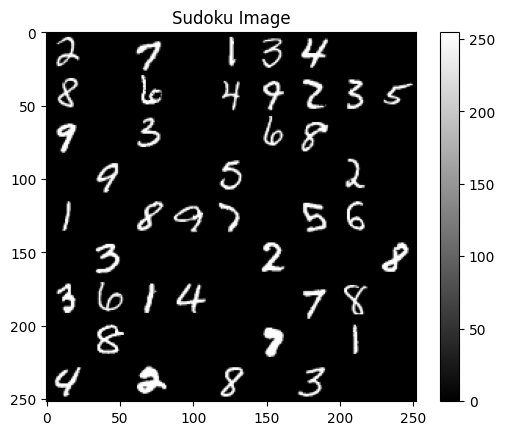

In [98]:
import matplotlib.pyplot as plt

image = test_images[0, :, :]

plt.imshow(image, cmap='gray')  # 'gray' colormap for grayscale images
plt.title('Sudoku Image')
plt.colorbar()  # Add a colorbar to show pixel values
plt.show()


In [99]:
rows = []


for image in range(reshaped_predictions.shape[0]):
    for x in range(reshaped_predictions.shape[1]):
        for y in range(reshaped_predictions.shape[2]):
            cell_id = f'{image}_{x}{y}'
            cell_value = reshaped_predictions[image][x][y]
            rows.append({'id': cell_id, 'value': cell_value})

In [100]:
import pandas as pd
df = pd.DataFrame(rows)
df['value'] = df['value'].astype(int)

In [101]:
df

,id,value
0,0_00,0
1,0_01,9
2,0_02,0
3,0_03,0
4,0_04,0
...,...,...
809995,9999_84,5
809996,9999_85,0
809997,9999_86,0
809998,9999_87,6


In [102]:
df.to_csv('submission.csv', index=False)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the MLP model
class SudokuMLP(nn.Module):
    def __init__(self):
        super(SudokuMLP, self).__init__()
        self.fc1 = nn.Linear(252 * 252, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 81 * 9)  # Output layer, assuming 9x9 Sudoku grid

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x.view(-1, 9, 9)  # Reshape to match the 9x9 grid


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F

class SudokuCNN(nn.Module):
    def __init__(self):
        super(SudokuCNN, self).__init__()
        self.conv1 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 3 * 3, 128)  # Adjust this line
        self.fc2 = nn.Linear(128, )  # Assuming 81 classes for a 9x9 Sudoku grid

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        print(x.size()) 
        x = self.pool(F.relu(self.conv2(x)))
        print(x.size())
        x = x.view(-1, 64 * 3 * 3) 
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Convert labels to class indices (0 to 8)
train_labels_indices = train_labels_processed

max_label = torch.max(train_labels_indices)
min_label = torch.min(train_labels_indices)

#print(max_label, min_label)

# Instantiate the model
sudoku_model = SudokuCNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(sudoku_model.parameters(), lr=0.001)

# Assuming train_labels is a PyTorch tensor containing labels for the training data
train_dataset = TensorDataset(train_images_processed, train_labels_indices)

# Create DataLoader for training data
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        print(inputs.size())
        outputs = sudoku_model(inputs)
        # outputs_flat = outputs.view(-1, 81)
        # labels_flat = labels.view(-1)
        #print(outputs_flat.size(),labels_flat.size())
        #loss = criterion(outputs, labels)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()



torch.Size([64, 252, 252])
torch.Size([32, 126, 126])
torch.Size([64, 63, 63])


ValueError: Expected input batch_size (441) to match target batch_size (64).

In [ ]:

# After training, you can use the model to make predictions on test data
# Assuming normalised_resized_test_images is a PyTorch tensor
test_outputs = sudoku_model(test_images_processed)

# You can convert the test_outputs to predictions using argmax
_, predictions = torch.argmax(test_outputs, 1)

correct_predictions = torch.sum(predictions == test_labels_processed)
total_samples = len(test_labels_processed)

accuracy = correct_predictions.item() / total_samples
print(f"Accuracy: {accuracy * 100:.2f}%")

In [ ]:
a

NameError: name 'a' is not defined

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets
from torch.utils.data import DataLoader
from torch import optim
from torchvision import transforms
from torch.utils.data import random_split
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
def _get_conv_output_size(input_size, out_channels, model):
    batch_size = 1
    input_tensor = torch.autograd.Variable(torch.rand(batch_size, *input_size))
    output_feat = model.features(input_tensor)
    n_size = output_feat.data.view(batch_size, -1).size(1)
    return n_size

In [ ]:
class CNN(nn.Module):
    def __init__(self, out_channels):
        super(CNN, self).__init__()

        conv_layers = []
        num_conv_layers = len(out_channels)

        for i in range(num_conv_layers):
            if i == 0:
                conv_layers.append(nn.Conv2d(1, out_channels[i], kernel_size=3, padding=1))
            else:
                conv_layers.append(nn.Conv2d(out_channels[i-1], out_channels[i], kernel_size=3, padding=1))

            conv_layers.append(nn.ReLU())
            conv_layers.append(nn.MaxPool2d(kernel_size=2, stride=2))

        self.features = nn.Sequential(*conv_layers)
        self.fc1 = nn.Linear(_get_conv_output_size((1, 28, 28), out_channels, self), 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x


In [ ]:
def mnist_train(out_channels, num_epochs, batch_size, learning_rate, device, plots):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

    train_dataset = datasets.MNIST(root='./mnist/train', train=True, download=False, transform=transform)
    test_dataset = datasets.MNIST(root='./mnist/test', train=False, download=False, transform=transform)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    cnn_model = CNN(out_channels)
    cnn_model.to(device)


    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(cnn_model.parameters(), lr=learning_rate)

    train_losses = []
    test_losses = []
    accuracies = []

    # Training loop
    for epoch in range(num_epochs):
        # Train the model
        cnn_model.train()
        train_loss = 0.0
        correct = 0
        total = 0
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = cnn_model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * images.size(0)

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss /= len(train_loader.dataset)
        train_losses.append(train_loss)

        accuracy = 100 * (correct / total)
        accuracies.append(accuracy)

        cnn_model.eval()
        test_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images = images.to(device)
                labels = labels.to(device)

                outputs = cnn_model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item() * images.size(0)

                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_loss /= len(test_loader.dataset)
        test_losses.append(test_loss)

        print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}")

    if plots:
        plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
        plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        plt.plot(range(1, num_epochs + 1), accuracies, label='Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

    return cnn_model, (train_losses, test_losses, accuracies)

Train-Validation-Test Split

In [ ]:
normalised_train_images = normalized_resized_train_images[:, np.newaxis, :, :]

# Print the shape to verify
print("Shape after adding channel dimension:", normalised_train_images.shape)

Shape after adding channel dimension: torch.Size([50000, 1, 128, 128])


In [ ]:
train_images = normalised_train_images[:4000]
train_labels = modified_labels[:4000]

validation_images = normalised_train_images[40:45]
validation_labels = modified_labels[40:45]

test_images = normalised_train_images[45:60]

In [ ]:
train_images.shape

torch.Size([4000, 1, 128, 128])

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

batch_size = 8

train_images_tensor = torch.Tensor(train_images)
train_labels_tensor = torch.Tensor(train_labels)
train_dataset = TensorDataset(train_images_tensor, train_labels_tensor)  
train_dataloader = DataLoader(train_dataset, batch_size, shuffle = True)

validation_images_tensor = torch.Tensor(validation_images)
validation_labels_tensor = torch.Tensor(validation_labels)
validation_dataset = TensorDataset(validation_images_tensor, validation_labels_tensor)  
validation_dataloader = DataLoader(validation_dataset, batch_size, shuffle = True)

test_images_tensor = torch.Tensor(test_images)
test_dataset = TensorDataset(test_images_tensor)  
test_dataloader = DataLoader(test_dataset, batch_size, shuffle = True)


In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

batch_size = 8
test_images_tensor = torch.Tensor(test_images)
test_dataset = TensorDataset(test_images_tensor)  
test_dataloader = DataLoader(test_dataset, batch_size, shuffle = True)

In [ ]:
data_list = list(train_dataloader)
images, labels = data_list[0]  # Assuming your data is a tuple of images and labels
print("Image shape:", images.shape)
print("Labels shape:", labels.shape)


Image shape: torch.Size([8, 1, 128, 128])
Labels shape: torch.Size([8, 81, 3])


In [ ]:
import torch
# define function mnist_train so that it can be run from this cell
from mnist import mnist_train

# Set the hyperparameters
out_channels = [16, 32, 128]  # Number of output channels in the CNN blocks
num_epochs = 10
batch_size = 34
learning_rate = 0.001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
plots = True  # Set to True to produce plots of train and test losses

# Train the CNN model
mnist_model, (train_losses, test_losses, accuracies) = mnist_train(out_channels, num_epochs, batch_size, learning_rate, device, plots)
print(mnist_model)

Epoch [1/10], Train Loss: 0.1292, Test Loss: 0.0476, Accuracy: 96.00
Epoch [2/10], Train Loss: 0.0459, Test Loss: 0.0753, Accuracy: 98.60
Epoch [3/10], Train Loss: 0.0332, Test Loss: 0.0294, Accuracy: 98.97
Epoch [4/10], Train Loss: 0.0284, Test Loss: 0.0301, Accuracy: 99.09
Epoch [5/10], Train Loss: 0.0220, Test Loss: 0.0409, Accuracy: 99.28
Epoch [6/10], Train Loss: 0.0193, Test Loss: 0.0416, Accuracy: 99.40


KeyboardInterrupt: 

Accuracy of the network on the test images: 100.00 %


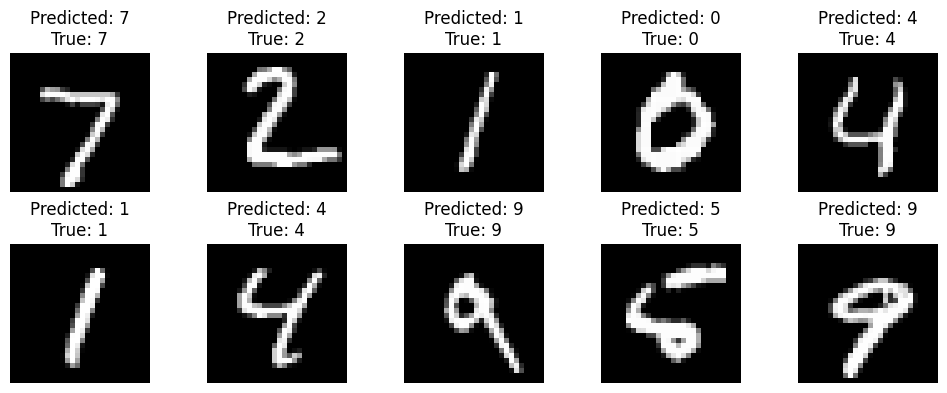

In [ ]:
from mnist import mnist_apply

# Apply the trained model on specific examples from the test set
test_indexes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # Indexes of examples from the test set
mnist_apply(mnist_model, test_indexes)

In [ ]:
test_images = np.load('./Task1/test/imgs.npy')

In [ ]:
normalised_test_images = test_images/255
normalised_test_images.shape

(10000, 252, 252)

In [ ]:
total_images=normalised_test_images.shape[0]
total_images

10000

In [ ]:
sudoku_grid=252

In [ ]:
x=y=9

In [ ]:
sudoku_tensor = torch.zeros(10000, 9, 9)

print(sudoku_tensor.shape)

torch.Size([10000, 9, 9])


: 

In [ ]:
image=0
for image in range(total_images):
    for cell in range(sudoku_grid):
        x=0
        for x in range(9):
            y=0
            for y in range(9):
                sudoku_tensor[image][x][y]=mnist_apply()
                y+=1
            x+=1
        cell+=29
    image+=1

In [ ]:
a

NameError: name 'a' is not defined

In [ ]:
import torch.nn as nn
import torch.optim as optim

# Assuming you have labeled data for x, y positions in your dataset
train_dataloader_positions = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Instantiate the position prediction model (similar to the previous example)
class PositionPredictionModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(PositionPredictionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

input_size = 252  # Adjust based on your input data
hidden_size = 128  # Adjust based on your model architecture
output_size = 9  # Adjust based on the number of classes (e.g., for x or y positions in a 9x9 Sudoku grid)

# Instantiate the position prediction model
position_model = PositionPredictionModel(input_size, hidden_size, output_size)

# Define loss function and optimizer for position prediction
criterion_positions = nn.CrossEntropyLoss()  # Use the appropriate loss function for position prediction
optimizer_positions = optim.Adam(position_model.parameters(), lr=0.001)

# Training loop for position prediction model (similar to the previous example)
for epoch in range(num_epochs):
    for batch in train_dataloader_positions:
        images, labels = batch
        images = images.view(images.shape[0], -1)

        # Extract x_labels and y_labels from the labels
        x_labels = labels[:, 0]  # Assuming x_labels are in the first column
        y_labels = labels[:, 1]  # Assuming y_labels are in the second column


        optimizer_positions.zero_grad()
        positions_output = position_model(images)
        loss_positions = criterion_positions(positions_output, torch.cat((x_labels, y_labels), dim=1))
        loss_positions.backward()
        optimizer_positions.step()

# Recognize digits and positions in Sudoku grid images
for sudoku_batch, positions_batch in zip(test_dataloader, train_dataloader_positions):
    sudoku_images, _ = sudoku_batch
    x_labels, y_labels = positions_batch

    # Recognize digits using mnist_model
    with torch.no_grad():
        digit_output = mnist_model(sudoku_images.view(sudoku_images.shape[0], -1))
    digit_predictions = torch.argmax(digit_output, dim=1)

    # Recognize positions using position_model
    with torch.no_grad():
        positions_output = position_model(sudoku_images.view(sudoku_images.shape[0], -1))
    x_position_predictions, y_position_predictions = torch.split(positions_output, split_size_or_sections=1, dim=1)

    # Now you have predictions for digit values, x positions, and y positions
    # Combine these predictions to obtain the final solution for the Sudoku grid
    final_predictions = list(zip(
        digit_predictions.tolist(),
        x_position_predictions.tolist(),
        y_position_predictions.tolist()
    ))
    # Do something with the predictions, e.g., print them
    print("Predicted Digits, X Positions, Y Positions:", final_predictions)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (34x63504 and 252x128)

In [ ]:
for batch in train_dataloader_positions:
    print(batch)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [ ]:
# Set the model to evaluation mode
mnist_model.eval()

# Initialize an empty list to store predictions
predictions = []

# Iterate over the test data loader
for batch in test_dataloader:
    # Extract the batch of images
    batch_images = batch[0]

    # Forward pass through the model
    with torch.no_grad():
        output = mnist_model(batch_images)

    # Process the output to get predictions
    # Assuming output is a tensor with the format [digit_value, x_position, y_position]
    digit_value_prediction = torch.argmax(output[:, :10], dim=1)
    x_position_prediction = torch.argmax(output[:, 10:19], dim=1)
    y_position_prediction = torch.argmax(output[:, 19:], dim=1)

    # Append the predictions to the list
    batch_predictions = list(zip(
        digit_value_prediction.tolist(),
        x_position_prediction.tolist(),
        y_position_prediction.tolist()
    ))
    predictions.extend(batch_predictions)

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SudokuSolverCNN(nn.Module):
    def __init__(self):
        super(SudokuSolverCNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

        # Fully connected layers
        self.fc1 = nn.Linear(64 * 252 * 252, 128)
        self.fc2 = nn.Linear(128, 81 * 3)  # Output x, y, value for each of the 27 cells

        # Dropout for regularization
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Convolutional layers
        print("Conv layers")
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        
        # Flatten the tensor before fully connected layers
        x = x.view(-1, 64 * 252 * 252)
        print("FC layer 1")
        # Fully connected layers with dropout
        x = F.relu(self.dropout(self.fc1(x)))
        
        print("FC layer 2")
        x = self.fc2(x)

        # Reshape the output to match the structure of labels (27 cells * 3 values)
        x = x.view(-1, 81, 3)

        return x

# Instantiate the model
model = SudokuSolverCNN()

# Print the model architecture
print(model)


SudokuSolverCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=4064256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=243, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    for images, labels in train_dataloader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(images)  # Forward pass

        # Print the sizes of the outputs and labels tensors
        print("Outputs size:", outputs.size())
        print("Labels size:", labels.size())

        # Assuming the correct size is [batch_size, output_size, 3]
        output_size = outputs.size(1)
        outputs = outputs.view(-1, output_size, 3)

        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

    # Validation loop
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for val_images, val_labels in validation_dataloader:
            val_outputs = model(val_images)

            # Assuming the correct size is [batch_size, output_size, 3]
            val_output_size = val_outputs.size(1)
            val_outputs = val_outputs.view(-1, val_output_size, 3)

            val_loss = criterion(val_outputs, val_labels)

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')


Conv layers


RuntimeError: shape '[-1, 4064256]' is invalid for input of size 8388608

In [ ]:
train_images[0].shape

(252, 252)

In [ ]:
# Test the model
model.eval()
with torch.no_grad():
    for test_images, test_labels in test_dataloader:
        test_outputs = model(test_images)
        # You can evaluate the test outputs as needed

In [ ]:
import torch.nn as nn
import torch.optim as optim

class Sudoku(nn.Module):
    def __init__(self, num_classes):
        super(Sudoku, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size)
        
        self.fc_x =nn.Linear(fc_input_size, 1)
        self.fc_y =nn.Linear(fc_input_size, 1)
        self.fc_value =nn.Linear(fc_input_size, num_classes)
        
    def forward(self, x):
        x=x.view(x.size(0), -1)
        x_cord = self.fc_x(x)
        y_cord = self.fc_y(y)
        value = self.fc_value(x)
        return x_cord, y_cord, value
    
    num_classes = 9
    
    model = Sudoku(num_classes)
    
    criterion_x = nn.MSELoss()
    criterion_y = nn.MSELoss()
    criterion_y = nn.CrossEntropyLoss()
    
    optimizer = optim.Adam(model.parameters(), lr = 0.001)

NameError: name 'Sudoku' is not defined

In [ ]:
for epoch in range(num_epochs):
    for images, labels in train_dataloader:
        optimizer.zero_grad()
        x_cord, y_cord, value = model(images)
        loss_x = criterion_x(x_cord, labels['x'].float())
        loss_y = criterion_y(y_cord, labels['y'].float())
        loss_value = criterion_value(x_cord, labels['value'])
        total_loss = loss_x + loss_y + loss_value
        total_loss.backward()
        optimizer.step()